In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


### Loading Data

In [39]:
data=pd.read_csv("data_for_lr.csv")

In [40]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [42]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [43]:
data.isna()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


### Data processing


In [56]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Spliting the data


##### Training input and output data

In [57]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))



Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


### Linear regression


##### Forward propgation

f(x)=m*x+c

In [58]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

### Cost Function

##### summation(1/2n*(y-f(x))^2)

In [59]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

### Gradient Decent for Backpropagation


#####      df=y-f(x)
#####     dm=df*x
#####      dc= df*1 */

In [51]:
#### d(cost)/dm=df*df/dm

In [60]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

### Update parameters


##### m=m-(learning*dm)
##### c=c-(learning_rate*dc)

In [61]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters


### Model Training

In [62]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training 

Iteration = 1, Loss = 2837.083794141382


<Figure size 432x288 with 0 Axes>

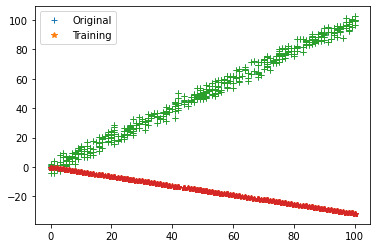

Iteration = 2, Loss = 1289.3247701175237


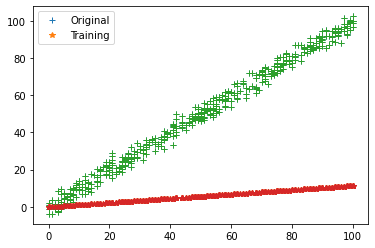

Iteration = 3, Loss = 587.1047865317964


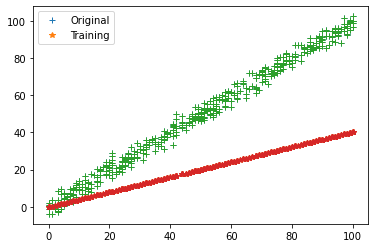

Iteration = 4, Loss = 268.5068021467399


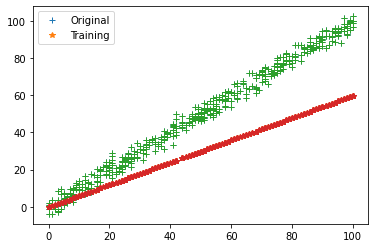

Iteration = 5, Loss = 123.95854371456599


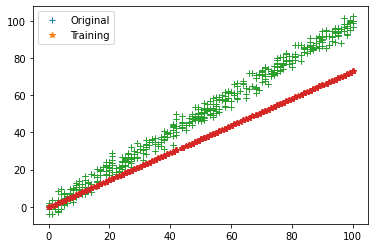

Iteration = 6, Loss = 58.376838731865924


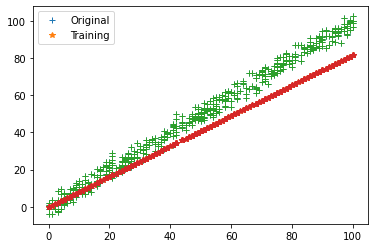

Iteration = 7, Loss = 28.622346515802466


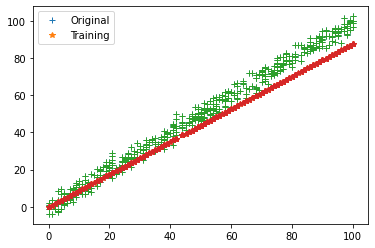

Iteration = 8, Loss = 15.122700415660773


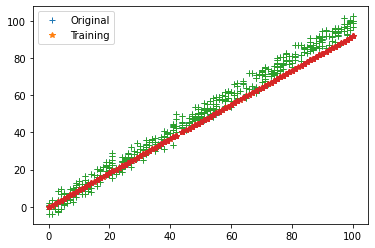

Iteration = 9, Loss = 8.997896002851475


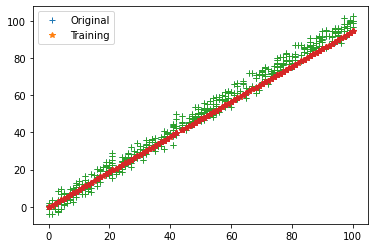

Iteration = 10, Loss = 6.219065432264691


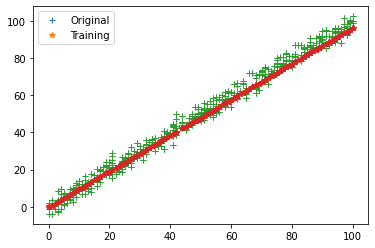

Iteration = 11, Loss = 4.958306900034047


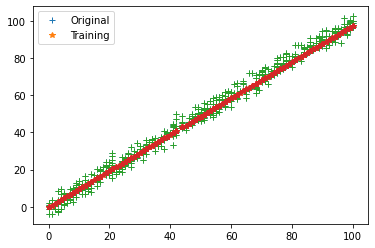

Iteration = 12, Loss = 4.386299333085954


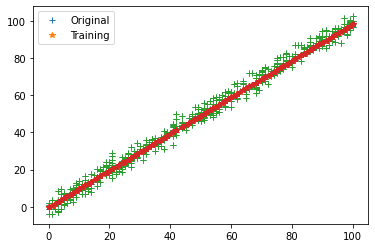

Iteration = 13, Loss = 4.126778841976748


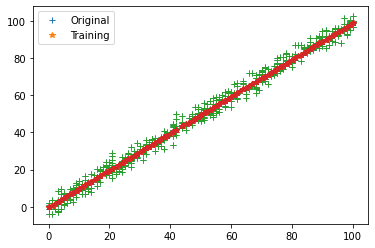

Iteration = 14, Loss = 4.009034083300438


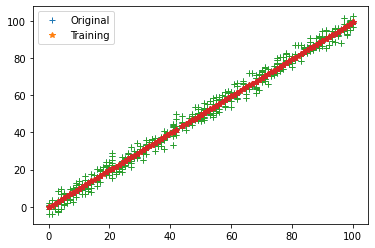

Iteration = 15, Loss = 3.955613131466803


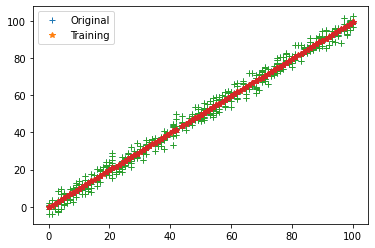

Iteration = 16, Loss = 3.9313759620466198


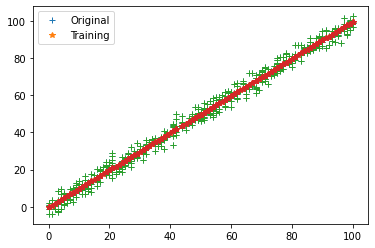

Iteration = 17, Loss = 3.92037950703381


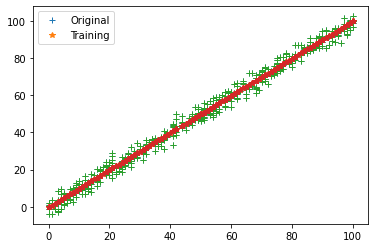

Iteration = 18, Loss = 3.915390378814815


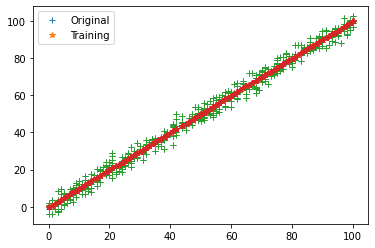

Iteration = 19, Loss = 3.913126781417365


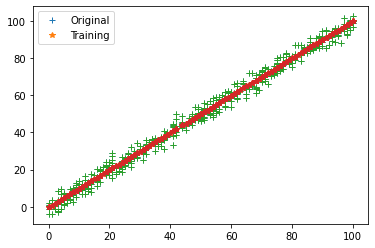

Iteration = 20, Loss = 3.9120997603737906


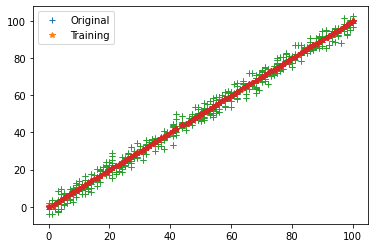

In [63]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 2039.1333411541375


<Figure size 432x288 with 0 Axes>

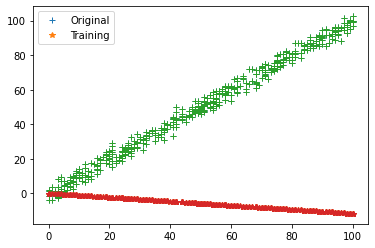

Iteration = 2, Loss = 927.2951874655377


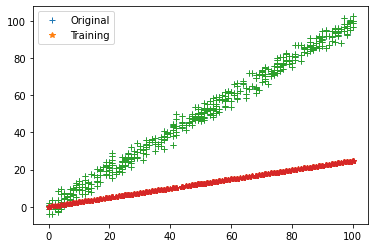

Iteration = 3, Loss = 422.8529855232233


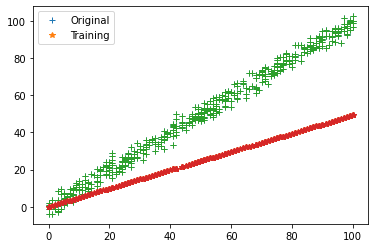

Iteration = 4, Loss = 193.98699966499268


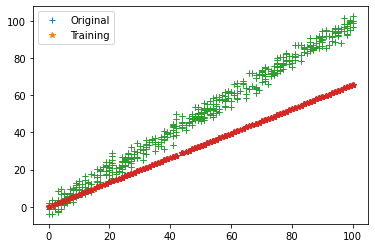

Iteration = 5, Loss = 90.15024828369059


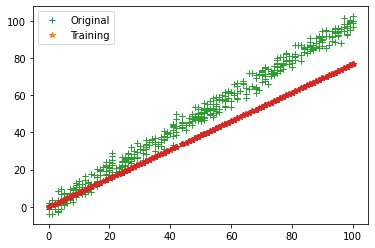

Iteration = 6, Loss = 43.03939907210855


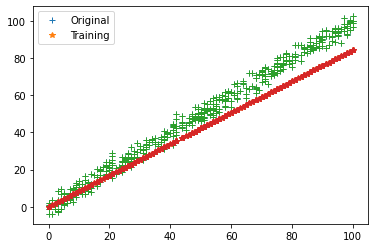

Iteration = 7, Loss = 21.665154506880615


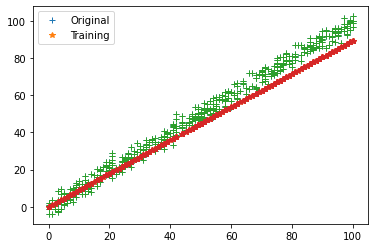

Iteration = 8, Loss = 11.967635976632375


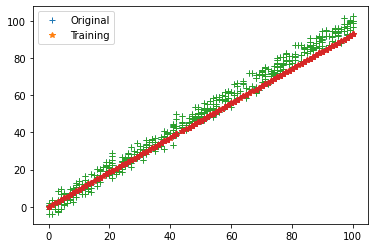

Iteration = 9, Loss = 7.567860982082283


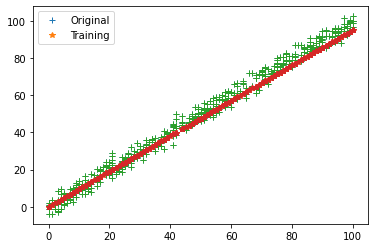

Iteration = 10, Loss = 5.57167809768232


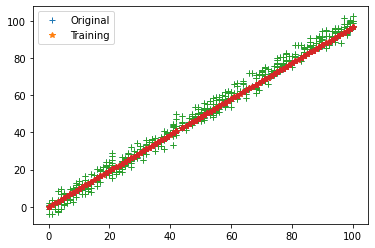

Iteration = 11, Loss = 4.666007615980023


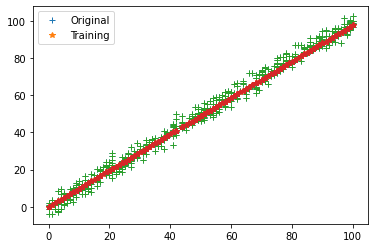

Iteration = 12, Loss = 4.2551038192829544


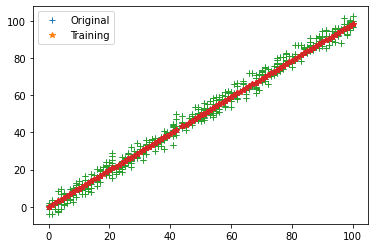

Iteration = 13, Loss = 4.068676215601578


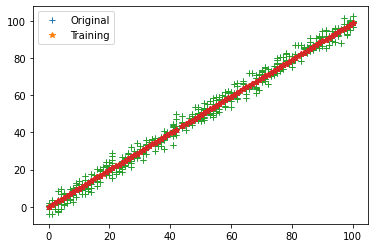

Iteration = 14, Loss = 3.984093709335335


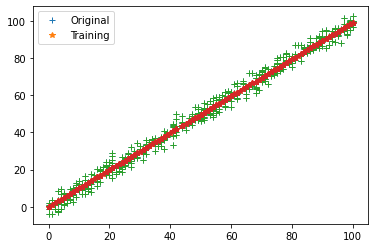

Iteration = 15, Loss = 3.9457184365790026


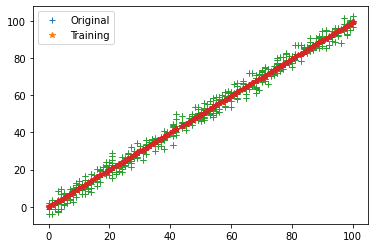

Iteration = 16, Loss = 3.9283074368519837


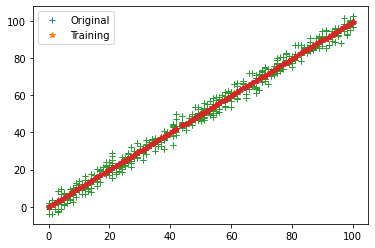

Iteration = 17, Loss = 3.9204079510240946


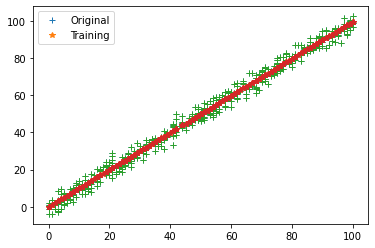

Iteration = 18, Loss = 3.916823849592417


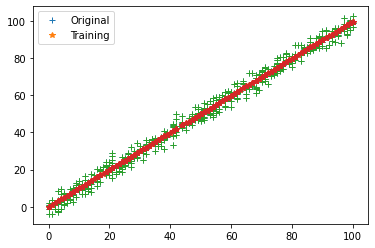

Iteration = 19, Loss = 3.915197642846035


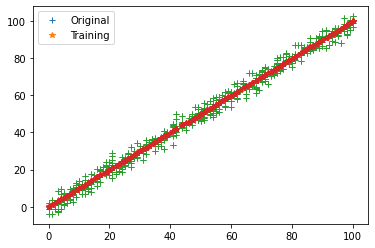

Iteration = 20, Loss = 3.9144597350918486


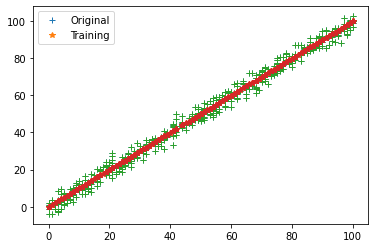

Iteration = 21, Loss = 3.9141248495791725


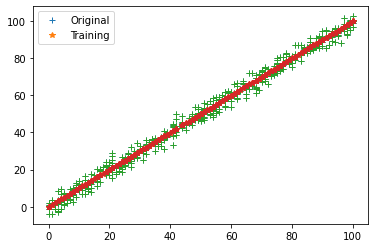

Iteration = 22, Loss = 3.913972815708705


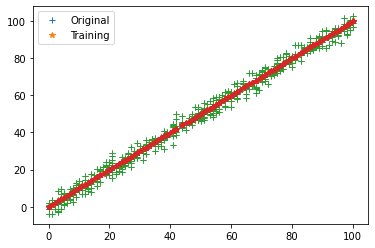

Iteration = 23, Loss = 3.9139037418356755


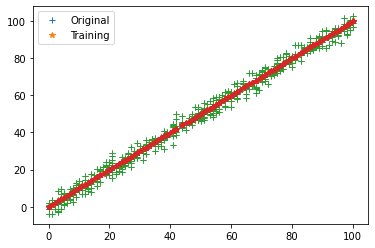

Iteration = 24, Loss = 3.913872307010206


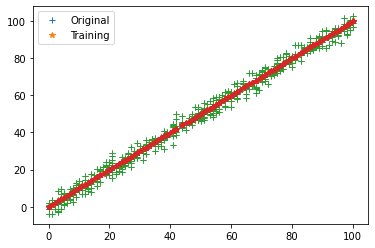

Iteration = 25, Loss = 3.9138579490671375


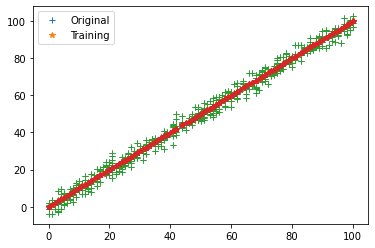

Iteration = 26, Loss = 3.913851338929361


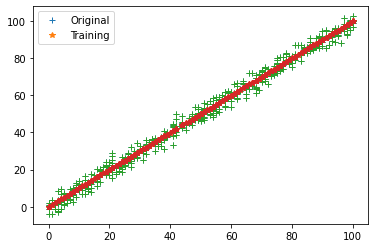

Iteration = 27, Loss = 3.913848243984261


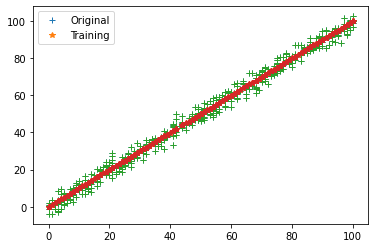

Iteration = 28, Loss = 3.9138467438908022


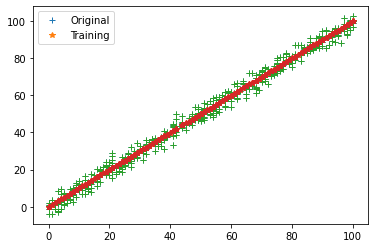

Iteration = 29, Loss = 3.9138459673881316


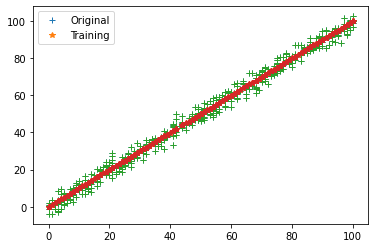

Iteration = 30, Loss = 3.913845519184233


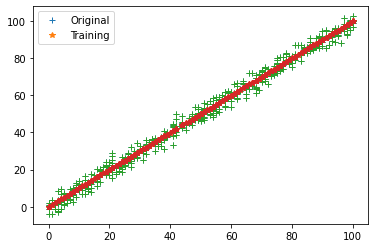

In [71]:
parameters, loss = train(train_input, train_output, 0.0001, 30)

In [64]:
print(parameters)

{'m': 1.001782657966821, 'c': -0.3199335099626535}


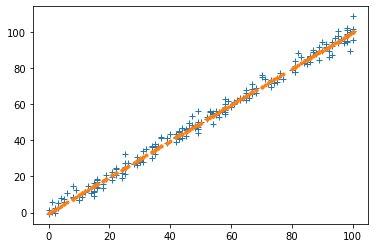

In [65]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()


In [72]:
cost_function(test_predictions,test_output)

4.034553693917951

In [74]:
loss

[2039.1333411541375,
 927.2951874655377,
 422.8529855232233,
 193.98699966499268,
 90.15024828369059,
 43.03939907210855,
 21.665154506880615,
 11.967635976632375,
 7.567860982082283,
 5.57167809768232,
 4.666007615980023,
 4.2551038192829544,
 4.068676215601578,
 3.984093709335335,
 3.9457184365790026,
 3.9283074368519837,
 3.9204079510240946,
 3.916823849592417,
 3.915197642846035,
 3.9144597350918486,
 3.9141248495791725,
 3.913972815708705,
 3.9139037418356755,
 3.913872307010206,
 3.9138579490671375,
 3.913851338929361,
 3.913848243984261,
 3.9138467438908022,
 3.9138459673881316,
 3.913845519184233]

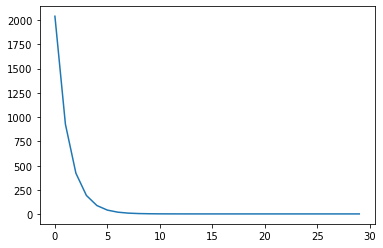

In [75]:
plt.plot(loss)

### Let's predict

In [76]:
test_predictions=test_input*parameters['m']+parameters['c']



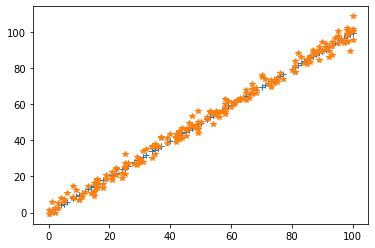

In [78]:
plt.plot(test_input,test_predictions,"+")
plt.plot(test_input,test_output,"*")
plt
plt.show()

### cost of prediction

In [83]:
pred=cost_function(test_output,test_predictions)

In [85]:
pred

4.000230212319106

In [84]:
pred +- 4.0562

-0.055969787680894